# Identification
Please indicate your name and parcours

Student 1: Defne Gulmez

Student 2: Yalda Eftekhari

# Practical works 9 & 10: Face recognition by Eigenfaces method


**The objective of this practical work is to study the properties of the Eigenfaces face recognition method.**

We propose to develop a system capable of:
- identify a face from a database of faces 
- determine whether an image contains a face present in the database
- to decide whether an image represents a face or not

Tools developed in this practical work will be applied to the Yale Faces Database.

## General principle

The problem of face recognition is defined as follows: given a face image, one wishes to determine the identity of the corresponding person.
To this end, it is necessary to have reference images, in the form of a database of faces of all persons known by the system. 
Each face is associated with a vector of characteristics. 
These characteristics are supposed to be invariant for the same person, and different from one person to another one. 
Face recognition then consists of comparing the vector of characteristics of the face to be recognized with those of each of the faces of the database. 
This makes it possible to find the person in the database having the most similar face.

There are several types of methods, distinguished by the type of characteristics used, see _S.A. Sirohey, C.L. Wilson, and R. Chellappa. Human and machine recognition of faces: A survey. Proceedings of the IEEE, 83(5), 1995_ for a state of the art:

- The approaches by face models proceed to a biometric analysis of faces. Pertinent biometrics are the distance between the eyes, length of the nose, and shape of the chin...
- Image-based approaches, by contrast, directly compare faces, considering them as images, for which measures of pre-attentive similarities (without a priori model) are defined.
- Hybrid approaches use the notions of similarity between images, but add a priori knowledge about the structure of a face.

![principe.png](./figs/Figure_1.png)
<center>Figure 1: General Principle of a Face Recognition System</center>

## Analysis by Eigenfaces

Face recognition by Eigenfaces is an image-based approach. 
Each face image is considered as a vector in a space having as many dimensions as the number of pixels in the image. 
The image characteristics are extracted by a method of dimensionality reduction based on principal component analysis (PCA). 
This approach was originally proposed in 1991, see Mr. Turk and A. Pentland. Eigenfaces for recognition. J. Cognitive Neuroscience, 3(1) :71-86, 1991_.

In the following, we will use the italic notation to designate scalars ($m, K,\dots$) and vectors ($x, u$), and boldface  for the matrices ($\mathbf X, \mathbf X_c, \mathbf W, \dots$).

A face image is noted $x$ and represented as a vector of $d$ components. $x[i] (i=0,\cdots,d-1)$ is the pixel number $i$ of this image. A set of faces form a cloud of points in the space $\mathbb{R}^d$. 
The database is divided into two sets: the *training* or *reference* set, used to learn the faces, and the *test* set, used to test the method. 
Faces of the training set are denoted by $x_k^{train}$ $(k=0,\cdots,N_{train}-1)$ and faces of the test set are denoted by $x_k^{test}$ $(k=0,\cdots,N_{test}-1) (k=0,\cdots,N_{test}-1)$.

We note $x_{average}$ the average of the reference faces, or average face. 
The principle of the Eigenfaces method is to model the difference of any face in relation to this average face by a linear combination of a limited number of images $u_h$, called Eigenfaces. 
One image of face $x \in \mathbb{R}^d$ is thus expressed as the average face to which is added a linear combination of eigenfaces:

$$x = x_{average} + \sum_h a_h u_h + \varepsilon$$

where $a_h$ represents the weight of *the eigenface* of index $h$ in the face $x$, and $\varepsilon$ represents the error between $x$ and its approximation by eigenfaces (the error is due to the truncation of the basis of eigenvectors). 
Coefficients $a_h$ play a very important role for face recognition, because they correspond to the face coordinates $x$ in the face subspace.

The Eigenfaces method is based on the fact that the number of eigenfaces is much smaller than the total size of the space, which is called dimensionality reduction. In other words, the basis of eigenfaces is truncated, keeping only the vectors coding for the most significant information.
The images are therefore analyzed in a sub-space of reduced dimensions, which represents more specifically faces, among all possible types of images.

The average face is always the same for a fixed reference database, each face is examined after subtraction of the average face.

## Face database

We use the Yale Faces image database, http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html.
In this database, all the faces have been preprocessed, in order to resize and crop them to the size $64\times64$ pixels, so the images can be compared pixel per pixel.


This database contains 120 greyscale images, representing the faces of 15 people. There are 8 images per person, each corresponding to a category of images varying according to the following criteria (see Figure 2):
- variation of facial expression: normal, sad, sleepy, surprised,
    wink, happy
- variation of accessories: glasses, noglasses,

![database.png](./figs/Figure_2.png)
<center>Figure 2: Illustration of the shooting categories</center>

The database is divided into two groups: the reference group will be used as a training set, and the other group as a test set: 
- the reference base contains $n$ images, each with a number of pixels $d=n_l\times n_c$. There are $6$ images per person in the training database, so $n=6\times15=90$. Each image is $64\times64$, hence $d=4096$, 
- the test base contains $2$ images per person so a total of 30 images. Each image is again $64\times64$.

In the following, we always manipulate face images in the form of vectors, and a set of faces in the form of a matrix where each column is a face. 
As we use Numpy, the images are stored in a multi-dimensional array of reals (double). 
This array is viewed as a matrix $\mathbf X$ of size $d\times n$: $$\mathbf X= \left[ x_0, ..., x_{n-1}\right]$$.

The matrix $\mathbf X$ is split into $\mathbf X^{train}$ and $\mathbf X^{test}$ of size $d\times N_{train}$ and $d\times N_{test}$, respectively.

# Exercise 1: loading the database, display, and centering of faces

Vectors $id$ and $cat$ give information about the images: $id[k]$ and $cat[k]$ are respectively the identification (an index) and the category of face $k$. These vectors are available for the reference and the test bases and will be useful in the following.

To load the database, we simply have to read the Matlab file `YaleFaces.mat` provided with this notebook: it provides the matrices and vectors $\mathbf X^{train}, \mathbf X^{test}, id^{train}, id^{test}, cat^{train}, cat^{test}$.

The following code loads the database and creates the various matrices and vectors: 

In [1]:
##### Useful libraries
import numpy.linalg
import numpy as np
import matplotlib.pyplot as plt

## Loading YaleFaces database
import scipy.io

yaleFaces = scipy.io.loadmat('./YaleFaces.mat')

# The training set (90 faces)
X_train = yaleFaces['X_train']
cat_train = yaleFaces['cat_train'][0]
id_train = yaleFaces['id_train'][0]-1

# The test set (30 faces)
X_test = yaleFaces['X_test']
cat_test = yaleFaces['cat_test'][0]
id_test = yaleFaces['id_test'][0]-1

# Additional images that don't contain faces 
X_noface = yaleFaces['X_noface']

1.  Write a function that computes the average face $x_{moy}$. \
    Tip: use `mean` function from Numpy.

In [2]:
def meanFaces(X):
    """ Array[d,n] -> Vector[d] """
    return np.mean(X, axis=1)


2.  Write a function that centers the faces. \
    Recall: center means subtract the average face.

In [3]:
def centeredFaces(X):
    """ Array[d,n]*Vector[d] -> Array[d,n] """
    return X - meanFaces(X)[:, np.newaxis]


3. Write a function `deflat()` that takes as argument a face, represented as a vector of 4096 elements, and returns an image of size $64\times64$. \
   Important: the Yale Faces database has been created in Matlab, for which the matrices are organized column by column. It may be useful to transpose the matrix.


In [4]:
def deflat(V):
    """" Vector[4096] -> Array[64,64] """
    return np.transpose(V.reshape((64,64)))
        

In [5]:
for col in range(X_train.shape[1]):
    deflat(X_train[:,col])

4. Display the average face, as well as a few faces with the associated centered faces. Here is an example of the expected result:
![Figure_3.png](./figs/Figure_3.png)
<center>Figure 3: average face and centering of the database</center>

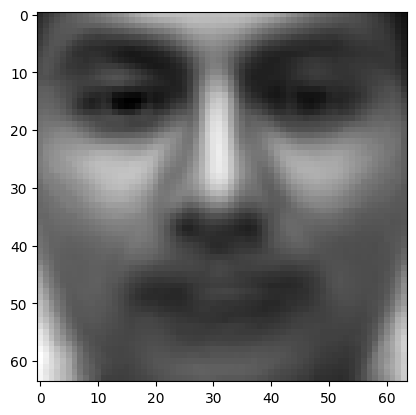

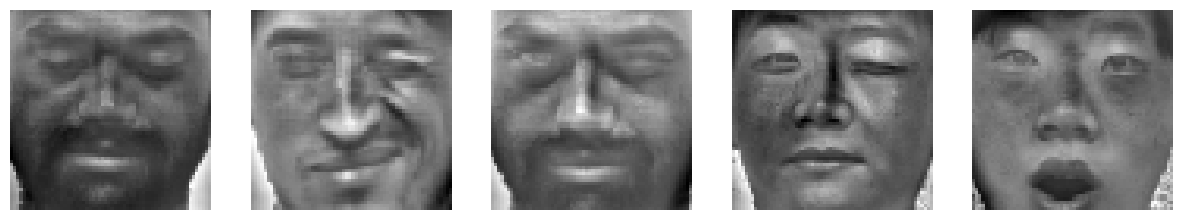

In [6]:
import random
ex = X_train[:,0]
mean_faces = meanFaces(X_train)
mean_face_deflated = deflat(mean_faces)
centered_faces = centeredFaces(X_train)
plt.imshow(mean_face_deflated, cmap='gray')

random_numbers = np.random.randint(0, 91, size=5)
plt.figure(figsize=(15, 5))

# Iterate over the random numbers and display the images
for i, idx in enumerate(random_numbers):
    # Extract the image
    img = deflat(centered_faces[:, idx])  # Use deflat to convert the vector into an image
    
    # Plot the image
    plt.subplot(1, 5, i + 1) 
    plt.imshow(img, cmap='gray') 
    plt.axis('off')
    
plt.show()


# Exercise 2: Computation of Eigenfaces (PCA)


The method developed by Turk and Pentland defines the eigenfaces as the main axes obtained by carrying out a principal component analysis (PCA) of the vectors associated with the reference faces. 
**The eigenfaces are thus the eigenvectors of the covariance matrix $\mathbf X_c\mathbf X_c^\top$**, of size $d\times d$ , where the matrix $\mathbf X_c$ of the same size as $\mathbf X$ represents all the centered faces:
$$\mathbf X_c= \left[ x_0-x_{moy}, \cdots x_{n-1}-x_{moy}\right]$$
Each line of $\mathbf X_c$ corresponds to a pixel $p$, each column of $\mathbf X_c$ corresponds to a reference face of index $k$.

Rather than using eigenvalue decomposition, we will use singular value decomposition (SVD). 
The SVD decomposes the matrix $\mathbf X_c$ of size $d\times n$ into 3 matrices $\mathbf U$, $\mathbf S$, $\mathbf V$ such as :

$$\mathbf X_c=\mathbf U \mathbf S\mathbf V^\top$$

where $\mathbf U$ and $\mathbf V$ are orthogonal matrices ($\mathbf U \mathbf U^\top=\mathbf U^\top \mathbf U=\mathbf I_d^d$ and $\mathbf V \mathbf V^\top=\mathbf V^\top \mathbf V=\mathbf I_d^n$) of respective sizes $d\times d$ and $n\times n$, and $\mathbf S$ is a matrix of size $d\times n$ with null elements everywhere except on the main diagonal.

This decomposition has the following properties:
- the columns of $\mathbf V$ are the eigenvectors of $\mathbf X_c^\top\mathbf X_c$, 
- the columns of $\mathbf U$ are the eigenvectors of $\mathbf X_c\mathbf X_c^\top$,
- the matrix $\mathbf S$ is diagonal. The diagonal represents the singular values of $\mathbf X_c$, equal to the square roots of the eigenvalues $\lambda_k$ of $\mathbf X_c^\top\mathbf X_c$ and
    $\mathbf X_c\mathbf X_c^\top$. 

With Numpy, the SVD can be calculated by this way:

`U, S, V = numpy.linalg.svd(Xc)`

In our case, $n<d$, and the eigenvalues $\lambda_k$ of $\mathbf X_c\mathbf X_c^\top$ are therefore all null for $k>n$.
We will not need the associated eigenvectors $k>n$. 
The `svd` function has a fast mode, which calculates only the eigenvectors corresponding to the columns of the matrix passed as argument:

`U, S, V = svd(Xc, full_matrices=False)`


This command returns the matrices $\mathbf U$ and $\mathbf V$, of size $d\times n$ and $n\times n$, and the matrix $\mathbf U$ matrix has been truncated, only the first $n$ columns are retained:
$$\mathbf U= \left[ u_1, \cdots, u_n\right]$$
Finally `S` is a vector of size $n$ and represents the diagonal matrix $\mathbf S$.

1. Write a function `eigenfaces(Xc)` which returns a t-uple consisting of the $\mathbf U$ matrix of eigenfaces, computed from a centered database $\mathbf X_c$, and the table of associated eigenvalues.
        

In [7]:
def eigenfaces(Xc):
    """ Array[d,n] -> Array[d,n]*Vector[n] """
    U, S, V = numpy.linalg.svd(Xc, full_matrices=False)   
    return U, S**2
 

2. Use this function to calculate $\mathbf U$ and $\mathbf S$. Normalize then the eigenvalues so that their sum is equal to 1.


In [8]:
U, S = eigenfaces(centered_faces)
S_sum = np.sum(S)
normalized_s = S / S_sum
np.sum(normalized_s)

1.0

In [9]:
normalized_s

array([2.62631198e-01, 1.35650972e-01, 6.99527969e-02, 6.54258154e-02,
       4.88407545e-02, 4.42607735e-02, 3.46973205e-02, 2.67408446e-02,
       2.39530976e-02, 2.18007818e-02, 2.02688110e-02, 1.55410108e-02,
       1.50200702e-02, 1.15381943e-02, 1.10568386e-02, 9.88464049e-03,
       9.23576004e-03, 8.42624740e-03, 8.04647790e-03, 7.57950015e-03,
       6.86836201e-03, 6.73289800e-03, 5.92149594e-03, 5.71749272e-03,
       5.60975263e-03, 5.40987789e-03, 4.99768646e-03, 4.85929935e-03,
       4.61391222e-03, 4.35340507e-03, 4.24582167e-03, 3.92424918e-03,
       3.77541902e-03, 3.46524702e-03, 3.40413686e-03, 3.19613482e-03,
       3.12845898e-03, 2.88254506e-03, 2.79773133e-03, 2.71605963e-03,
       2.59807584e-03, 2.54046008e-03, 2.44669319e-03, 2.38421156e-03,
       2.28460278e-03, 2.22971319e-03, 2.18230074e-03, 2.11452938e-03,
       2.03106354e-03, 1.89654752e-03, 1.82036500e-03, 1.76559766e-03,
       1.73105909e-03, 1.68456324e-03, 1.63966845e-03, 1.60454855e-03,
      

3. Display the average face and the first 15 eigenfaces (see figure 4, use the `plt.subplot()` function).
   and their associated own values. Give your interpretation of the eigenfaces images?

![Figure_4.png](./figs/Figure_4.png)
<center>Figure 4: the 15 first eigenfaces</center>

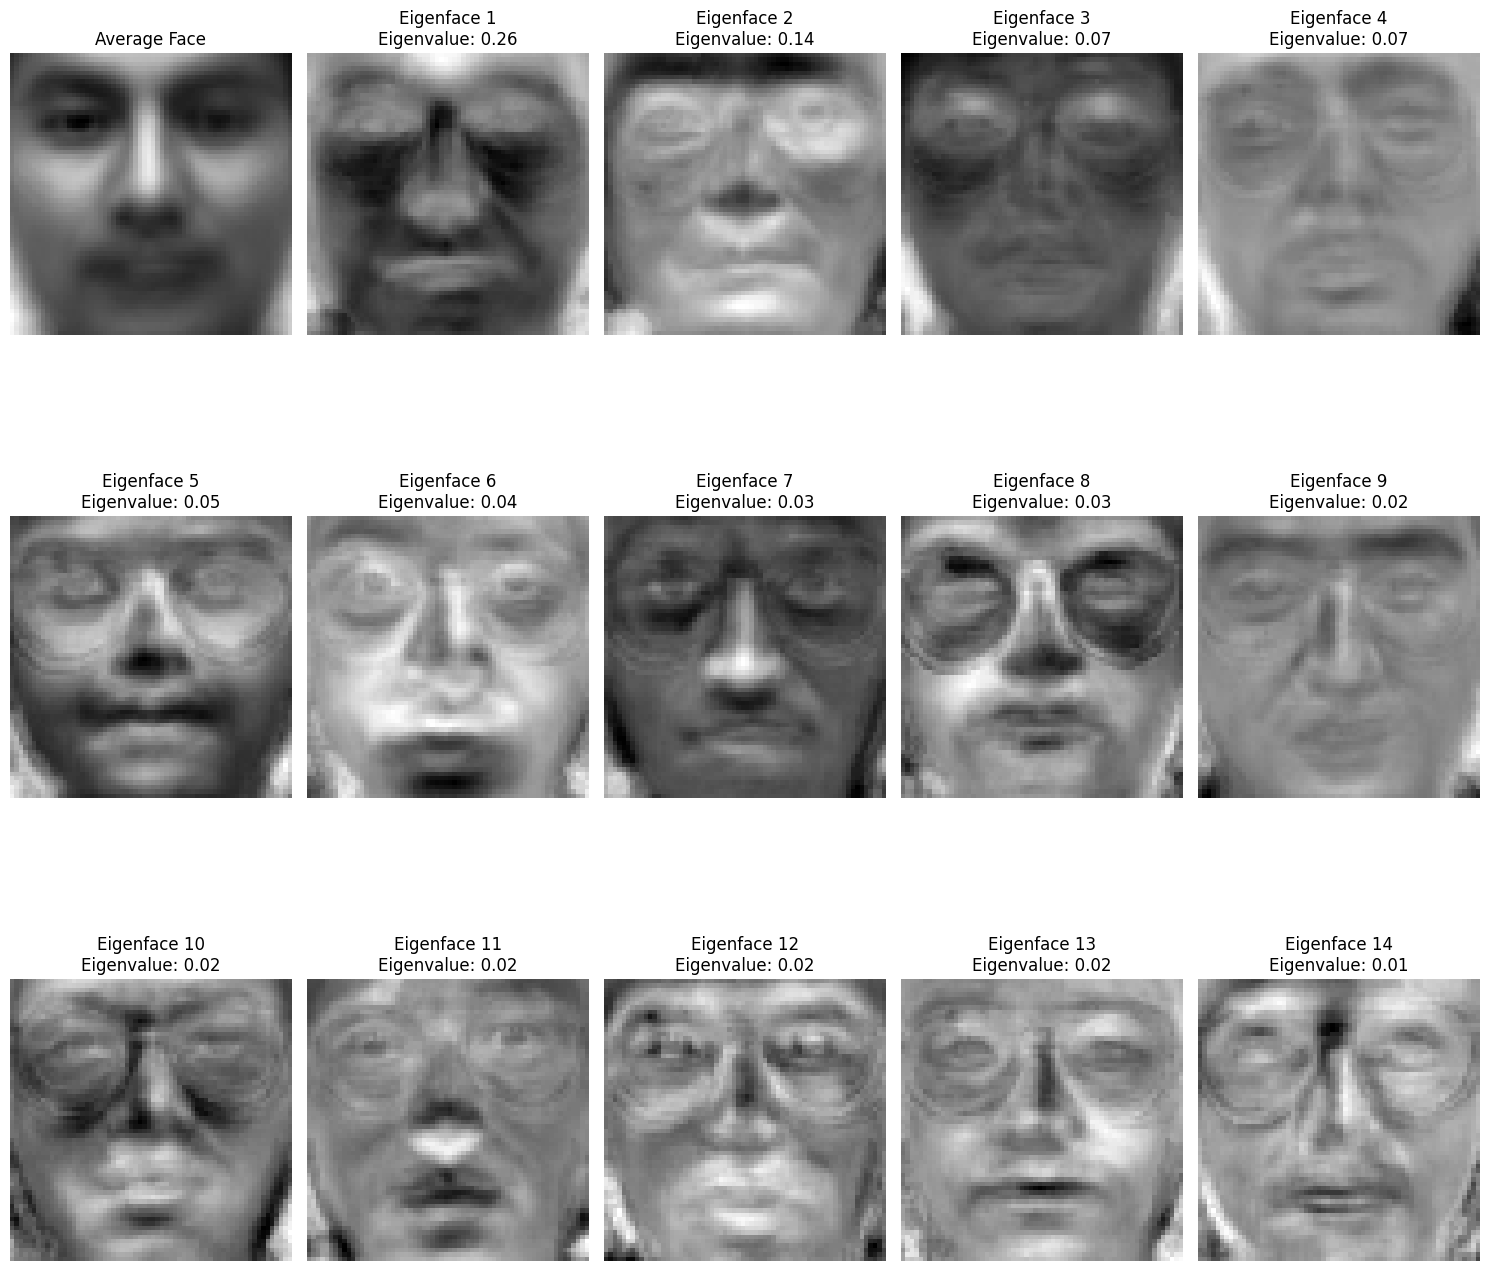

In [10]:

eigenfaces = U[:,:15]
eigenvalues = normalized_s
normalized_eigenfaces = eigenfaces / np.linalg.norm(eigenfaces, axis=0)

# Plot the average face and the first 15 eigenfaces along with their eigenvalues
plt.figure(figsize=(15, 15))

# average face
plt.subplot(3, 5, 1)  
plt.imshow(mean_face_deflated, cmap='gray')
plt.title("Average Face")
plt.axis('off')

# first 15 eigenfaces and their eigenvalues
for i in range(14):
    plt.subplot(3, 5, i + 2)  # Starting from position 2 to 16
    plt.imshow(deflat(normalized_eigenfaces[:, i]), cmap='gray')
    plt.title(f"Eigenface {i+1}\nEigenvalue: {eigenvalues[i]:.2f}")
    plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


4. Plot the curve of the cumulative sum of the normalized eigenvalues (see Figure 5 for the expected result), to see how much variation is captured by the first $K$ eigenfaces. How many eigenfaces are needed to obtain a good reconstruction?    
    
![Figure_5.png](./figs/Figure_5.png)
<center>Figure 5: cumulative sum of eigenvalues</center>

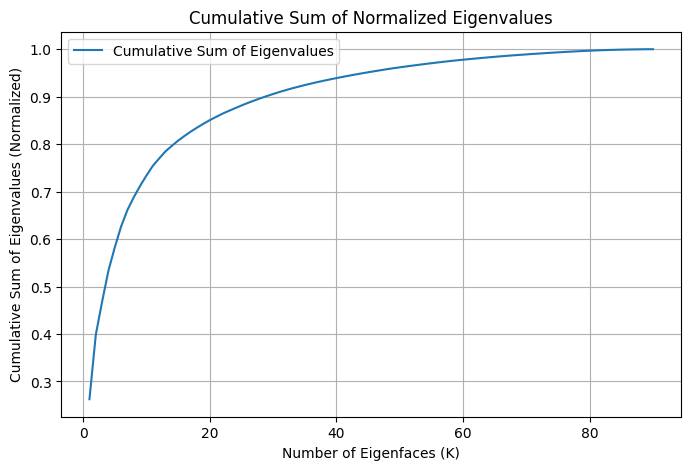

In [11]:
cumulative_sum = np.cumsum(eigenvalues)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_sum) + 1), cumulative_sum, label="Cumulative Sum of Eigenvalues")
plt.xlabel("Number of Eigenfaces (K)")
plt.ylabel("Cumulative Sum of Eigenvalues (Normalized)")
plt.title("Cumulative Sum of Normalized Eigenvalues")
plt.legend()
plt.grid()
plt.show()

# It should be noted that as the eigenvalues are normalized, the graph y-axis is not identical to the graph given in the question.
# Instead the eigenvalues sum up to 1

# Exercise 3: projection in the subspace of faces


In the following, we use a reduced number of eigenfaces/eigenvectors. The vectorial space of faces, $\mathbf W_K$, is spanned by the basis formed with the $K$ first eigenvectors:

$$\mathbf W_K = \left[ u_1, ..., u_K\right]$$

Note that the set of columns of $W_K$ is an orthonormal basis, so $\mathbf W^\top_K\times \mathbf W_K=\mathbf I_d^K$.

The **projection of a face image $x$ in the face subspace** is simply done by subtracting from $x$ the average face and applying the scalar product with each eigenvector. 
This gives the coordinates of the image $x$ in the subspace of faces, which is of dimension $K$.

Each face therefore has several representations:
-   the original image, a vector $x \in \mathbb{R}^d$
-   the coordinates of the projected image $z$ in the basis of eigenfaces,
    $\left\lbrace a_h\right\rbrace$,
    $h \in\left\lbrace 1;K\right\rbrace$ (subspace of faces):
    $$z = \mathbf W_K^\top (x-x_{average})$$
-   its reconstruction in the original space $\mathbb{R}^d$,
    $\tilde{x}$:
    $$\tilde{x} = x_{average} + \sum_h a_h u_h = x_{moy} + \mathbf W_K  z$$

**The reconstruction error is defined** as the distance between a face $x$ and the associated reconstruction $\tilde x$:
$$E^{recons}(x) =\|x-\tilde{x}\|_2  = \sqrt{\sum_{p=1}^d \left( x(p) - \tilde{x}(p)\right) ^2}$$

1. Write a function `projEigenfaces()` which takes as arguments a face, $x$, the average face, $x_{average}$, the subspace of faces $\mathbf W$, the number of eigenfaces $K$, and  computes the coordinates of projected face $z$ in the subspace $\mathbf W_K$ of faces.    

In [12]:
def projEigenface(x, x_mean, W, K):
    """ Vector[d]*Vector[d]*Array[d,n]*int -> Vector[K] """
    x_mean = x_mean.flatten()
    
    # Center the image by subtracting the mean face
    x_centered = x - x_mean
    
    # Select the first K eigenfaces
    W_K = W[:, :K]
    
    # Project the face onto the subspace
    z = np.dot(W_K.T, x_centered)
    
    return z

2.  Write a function `reconstruct()` which takes as arguments a projected face, $z$, the average face, $x_{average}$, and the truncated subspace of face, $W$ and $K$, and computes the coordinate of $x$ in the original space ($\mathbb{R}^n$).    

In [13]:
def reconstruct(z, x_mean, W, K):
    """Vector[K]*Vector[d]*Array[d,n]*int -> Vector[d] """
    W_K = W[:, :K]
    return x_mean +np.dot(W_K, z)


3.  Write a function  `errorReconstruct()` which computes the recontruction error between $\tilde{x}$ and $x$.

In [14]:
def errorReconstruct(x_r, x):
    """Vector[d]*Vector[d] -> float """
    return np.linalg.norm(x-x_r)

4.  Write a function `affiche_Reconstruction()` which displays:
    - the original face $x$,
    - the reconstructed faces $x_r$ for various values of $K$ (for instance, $K =$ 5, 10, 25, 50, 90).

In [15]:
def affiche_reconstruction(x, x_moy, W, listK, title):
    """ Vector[d]*Vector[d]*Array[d,n]*list[int]*str -> NoneType """

    #for debugging
    d = x.shape[0]
    img_size = int(np.sqrt(d))
    assert img_size ** 2 == d, "vector size must be a square."

    x_centered = x - x_moy 
    
    plt.figure(figsize=(15, 5))

    # Original Face display
    plt.subplot(1, len(listK) + 1, 1)
    plt.imshow(x.reshape(img_size, img_size).T, cmap="gray")
    plt.title("Original Face\nError: 0.00")
    plt.axis("off")

    # Reconstructions for each K
    for i, K in enumerate(listK):
        # Project the face into the subspace of K eigenfaces
        W_K = W[:, :K]
        z = np.dot(W_K.T, x_centered)

        # Reconstruct the face
        x_r = x_moy + np.dot(W_K, z)

        # reconstruction error
        error = np.linalg.norm(x - x_r)

        # Display 
        plt.subplot(1, len(listK) + 1, i + 2)
        plt.imshow(x_r.reshape(img_size, img_size).T, cmap="gray")

        # Format error for very small values as the question specifically aks for it
        if error < 1e-10:
            error_str = f"{error:.3e}"
        else:
            error_str = f"{error:.2f}"

        plt.title(f"K = {K}\nError: {error_str}")
        plt.axis("off")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


5.  Test the previous functions by displaying the projection/reconstruction result for several images (from the training and test bases). Figure 6 shows the result of the reconstruction for image 50 of the training base. For image 55 of the training base, what is the reconstruction error for $K=n=90$? Is the image identical to its reconstruction? Same question for image 17 of the test base.

![Figure_6.png](./figs/Figure_6.png)
<center>Figure 6: Example of reconstruction for image number 50</center>

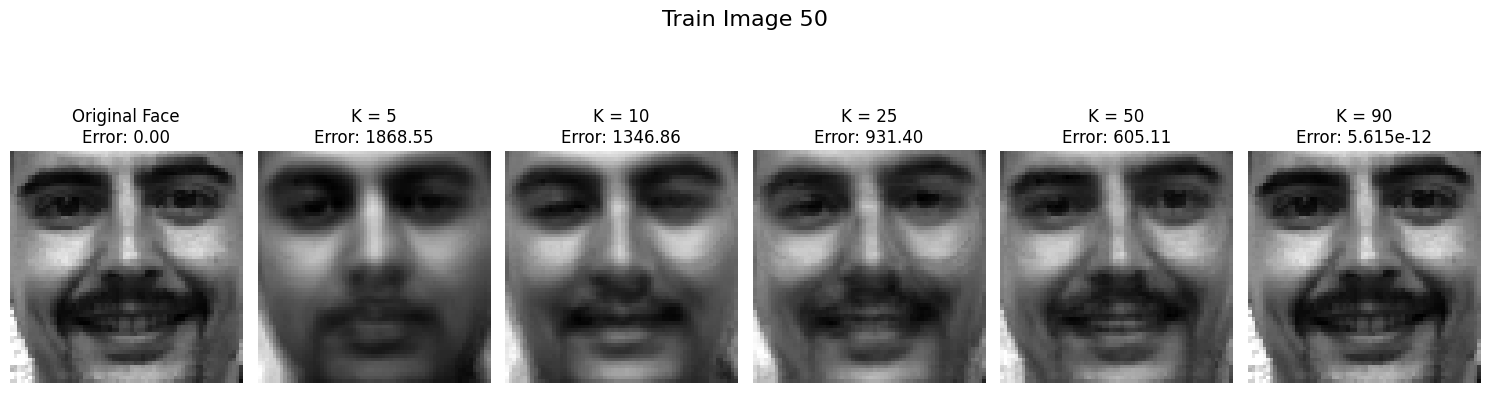

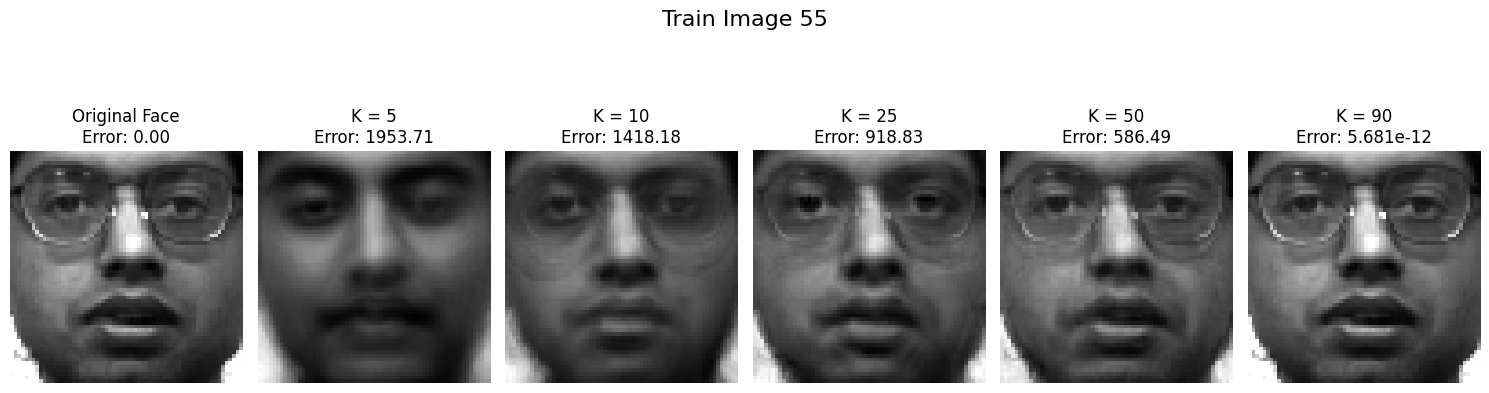

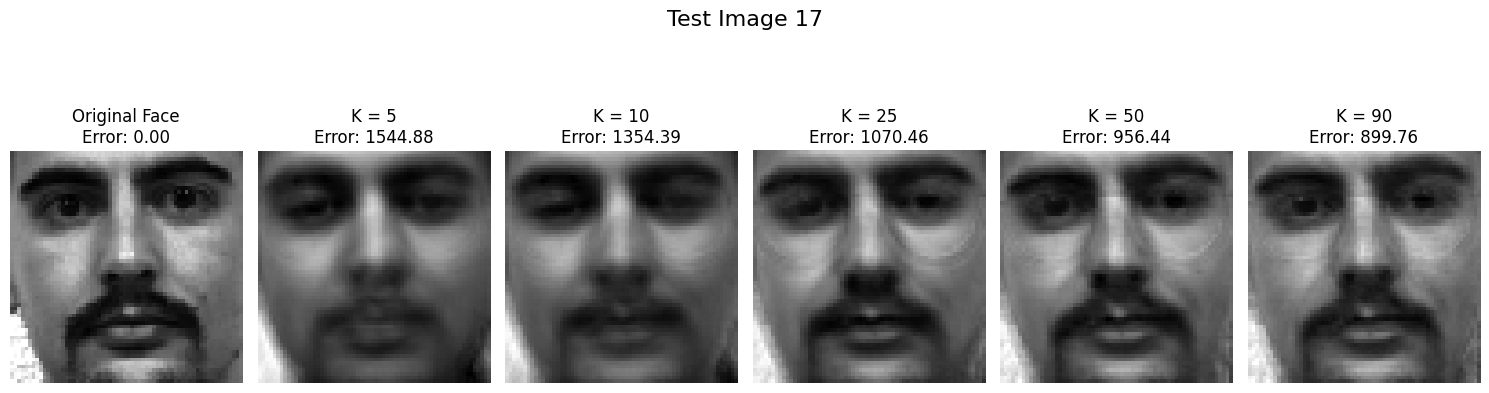

In [16]:
# Recalculating eigenfaces for up to K=90
eigenfaces = U[:, :95]
eigenvalues = normalized_s
normalized_eigenfaces = eigenfaces / np.linalg.norm(eigenfaces, axis=0)

# Images
image_train_50 = X_train[:, 49]  # Image 50 in training
image_train_55 = X_train[:, 54]  # Image 55 in training
image_test_17 = X_test[:, 16]    # Image 17 in test

# K list given above
K_values = [5, 10, 25, 50, 90]

# Display results for Train Image 50
affiche_reconstruction(image_train_50, mean_faces, normalized_eigenfaces, K_values, "Train Image 50")

# Display results for Train Image 55
affiche_reconstruction(image_train_55, mean_faces, normalized_eigenfaces, K_values, "Train Image 55")

# Display results for Test Image 17
affiche_reconstruction(image_test_17, mean_faces, normalized_eigenfaces, K_values, "Test Image 17")


For image 55 the error for k=90 is around 0 but not exactly 0. This shows that the image is almost identical to its reconstruction.

For image 17 the error for k = 90 is 899, which shows that the image and its reconstruction are not identical. 

6. Is there a difference between the reconstructions of the faces from the training base and those from the test base? Why?

Reconstructed faces for the training base are much more accurate regarding their original image, and therefore they have lower errors. On the other hand, for the test base, we see higher errors and less accuracy between the reconstructed image and the original image. This is expected since the faces in the training dataset are used to construct the eigenfaces and therefore these faces are spanned by the eigenfaces. However, the faces in the testing dataset may contain features not represented fully by the eigenfaces, as they do not form them directly. 


7. __Bonus question__: Plot the evolution of the average error of reconstruction of test faces when $K$ varies from 1 to $N$. Is this evolution consistent with the cumulative sum previously calculated (exercise 2, question 4)?

In [17]:
#to see until what value we should take the K_range
X_test.shape

(4096, 30)

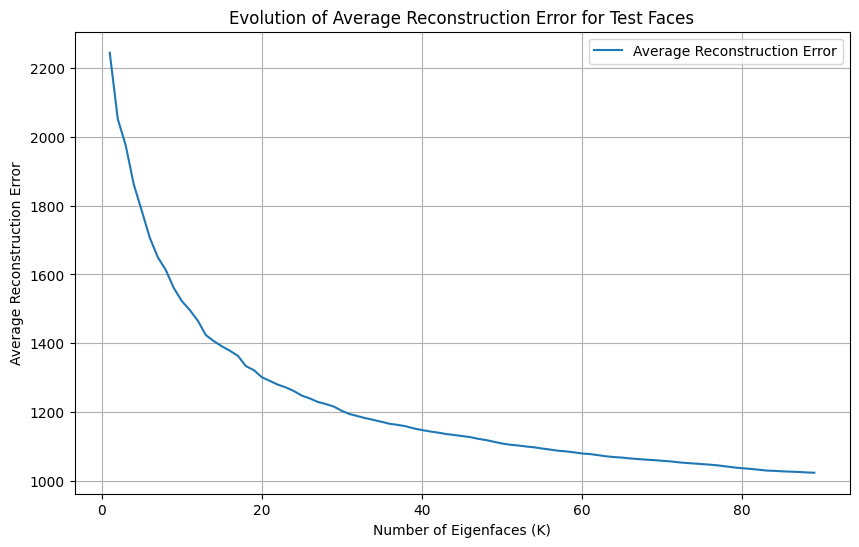

In [18]:

average_errors = []
K_range = range(1, 90)  # K values from 1 to 90

for K in K_range:
    total_error = 0
    for i in range(X_test.shape[1]):
        test_face = X_test[:, i]
        z = projEigenface(test_face, mean_faces, normalized_eigenfaces, K)
        reconstructed = reconstruct(z, mean_faces, normalized_eigenfaces, K)
        total_error += errorReconstruct(reconstructed, test_face)
    average_errors.append(total_error / X_test.shape[1])

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(K_range, average_errors, label="Average Reconstruction Error")
plt.xlabel("Number of Eigenfaces (K)")
plt.ylabel("Average Reconstruction Error")
plt.title("Evolution of Average Reconstruction Error for Test Faces")
plt.legend()
plt.grid()
plt.show()


We see that the average reconstruction error significantly decreases as the number if eigenfaces(K) increases. This is expected and aligns with the cumulative sum graph of the eigenfaces. This is because as more eigenfaces included into the average the more variance of the faces we include in the calculation which decreases the AVERAGE error. 

# Exercise 4: Face recognition and identification

Each reference face $x_k^{train}$ has an identity associated with it, in the form of a $id^{train}(k)$ number. In this section, we try to identify a face $x^{test}$ from the reference faces.

The simplest method is to compare the projection $z^{test}$ of the test face $x^{test}$ with the projection $z_k^{train}$ of each reference image $x_k^{train}$ (see Figure 7). The dissimilarity between the two projected vectors is quantified by the distance in subspace $E_k(x^{test})$:

$$E_k(x^{test}) =\|z^{test}-z_k^{train}\|_2$$

![Figure_7.png](./figs/Figure_7.png)
<center>Figure 7: Projection of an image $J$ in the subspace of faces and comparison with a reference face $I_k$, in case $K=2$.<center>

This distance is evaluated for each reference face, we can determine the reference face $x_k^{train}$ closest to the test face $x^{test}$. **Its identifier $id^{train}(k)$ then allows for the recognition of the tested face.**


1.  What is the advantage of calculating the distance $E_k(x^{test})$ in the subspace of faces rather than in the original space?

We decrease the dimensionality which increases the speed of the computation. Also, the subspace emphasizes the most significant features, making sure that calculating the distance in this subspace prioritizes these features when comparing the test and training datasets.

2.  Write a function ``computeMatDist()`` which takes as arguments the training set of centered faces, $\mathbf Xc_{train}$ of size $d\times N_{train}$, the test set of centered faces, $\mathbf Xc_{test}$ of size $d\times N_{test}$, the subspace of eigenfaces, $\mathbf W$ and $K$, and computes the matrix $D$ of distance between a face of the test set and a face of the training set. $D$ is of size $N_{test} \times N_{train}$.

In [19]:
def calculMatDist(X_train, X_test, W, K):
    """ Array[d,n]*Array[d,m]*Array[d,n]*int -> Array[m,n]"""
    W_K = W[:, :K]

    Z_train = np.dot(W_K.T, X_train)
    Z_test = np.dot(W_K.T, X_test)

    Dist =np.zeros((Z_test.shape[1], Z_train.shape[1]))

    for i in range(Z_test.shape[1]):
        for j in range(Z_train.shape[1]):
            Dist[i, j]= np.linalg.norm(Z_test[:, i]- Z_train[:, j])

    return Dist

3.  Write a function `identification()` which takes as argument the matrix of distances $D$ (computed by the previous function), the vector of identification of the training set $id^{train}$, and returns the identificaton vector $\hat{id}^{test}$ of size $N_{test}$ of the elements of the test set.

In [20]:
def identification(D, id_train):
    """ Array[m,n]*Array[n] -> Array[m]"""
    closest = np.argmin(D, axis=1)
    id_test = id_train[closest]

    return id_test

4. Compute for $K=30$ the identification rate by comparing $\hat{id}^{test}$ to $id^{test}$ labels. Then vary $K$, and plot the curve of the number of recognized faces as a function of $K$. Explain the shape of the curve obtained. Which value of $K$ can be taken to have a good recognition and a low calculation time?

In [21]:
#for k values
U.shape[1]

90

Identification rate for K=30: 90.00%


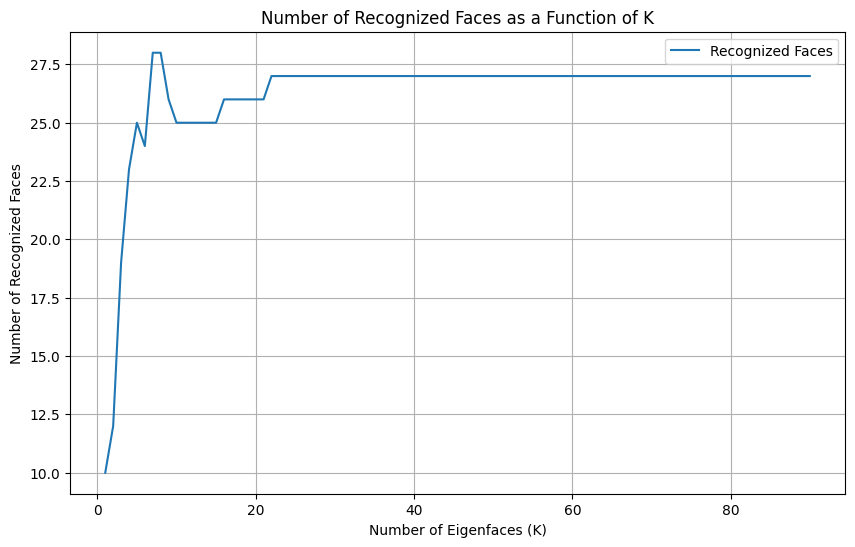

In [22]:
#identification rate for K=30
K= 30
Dist = calculMatDist(X_train, X_test, normalized_eigenfaces, K)
identification_rate = np.mean(identification(Dist, id_train) == id_test)* 100
print(f"Identification rate for K={K}: {identification_rate:.2f}%")

#curve
K_range = range(1, 91)
recognized_faces = []

for K in K_range:
    D = calculMatDist(X_train, X_test, normalized_eigenfaces, K)
    id_test_predicted = identification(D, id_train)
    recognized_faces.append(np.sum(id_test_predicted == id_test))

plt.figure(figsize=(10, 6))
plt.plot(K_range, recognized_faces, label="Recognized Faces")
plt.xlabel("Number of Eigenfaces (K)")
plt.ylabel("Number of Recognized Faces")
plt.title("Number of Recognized Faces as a Function of K")
plt.legend()
plt.grid()
plt.show()


Identification rate for K=30: 90.00%

Curve increases as K increases as more eigenfaces capture more variance which results in better discrimination. However, we can see that 
after k equals around 20 the curve flattens as the additional eigenfaces do not contribute to the overall discrimination process. The vale 
for k where we have good recognition and low calculation time could be around k=20.

5.  **Bonus question**: for $K=30$, calculate for each face of the training set its distance in the subspace $\mathbf W_K$ from each element of the training set. Display the result as the image of a matrix. Comment the result.

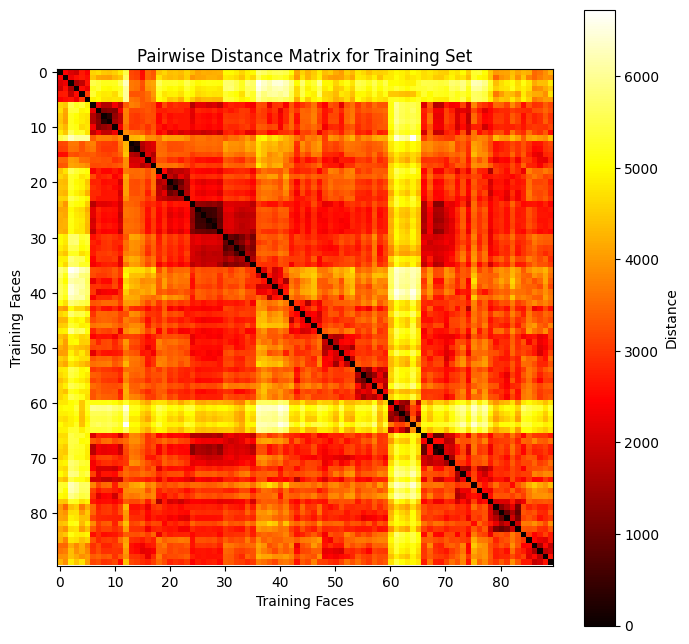

In [23]:
#NOT SURE ABOUT THIS
#NOT SURE IF THIS IS WHAT IS ASKED
K = 30
D_train = calculMatDist(X_train, X_train, normalized_eigenfaces, K)

plt.figure(figsize=(8, 8))
plt.imshow(D_train, cmap="hot", interpolation="nearest")
plt.colorbar(label="Distance")
plt.title("Pairwise Distance Matrix for Training Set")
plt.xlabel("Training Faces")
plt.ylabel("Training Faces")
plt.show()

We can see that the diagonal elements are zero as the distance of an element to itself is 0. The non-diagonal elements represent the distances of the faces to other faces. We can see that the overall difference is between values 4000 to 3000 based on the red color distribution. We can also see that the matrix is symmetric on the diagonal which is also expected as the distance between two pairs of faces is represented twice symmetrically around the diagonal. 

6. **Bonus question**: What are the minimal and maximal distances between two faces of the same category (i.e. same person)? Between two faces of different categories? If we want to choose a threshold $\theta$  to detect the presence of an unknown face, which indications do the previous min/max values give us?

In [24]:
same_cat_dist = []
diff_cat_dist = []
for i in range(len(id_train)):
    for j in range(len(id_train)):
        if i!=j: #not in the diagonal
            if id_train[i] == id_train[j]:
                same_cat_dist.append(D_train[i,j])
            else:
                diff_cat_dist.append(D_train[i,j])
        
same_min = np.min(same_cat_dist)
same_max = np.max(same_cat_dist)
diff_min =np.min(diff_cat_dist)
diff_max =np.max(diff_cat_dist)

print(f"min distance in same category: {same_min:.2f}")
print(f"max distance in same category: {same_max:.2f}")
print(f"min distance in different category: {diff_min:.2f}")
print(f"max distance in different category: {diff_max:.2f}")

# We want to ensure that faces from different categories are seen as distinct and that faces from the same category are considered similar 
# enough. So we are interested in the minimum distance between different categories and the maximum distance between the same category.
#So we choose the treshold theta = (same_max - diff_min)/2
threshold = (same_max + diff_min)/ 2
print(f"the chosen threshold: {threshold:.2f}")



min distance in same category: 270.87
max distance in same category: 4426.72
min distance in different category: 1264.61
max distance in different category: 6730.63
the chosen threshold: 2845.67


# Exercise 5: face/non-face classification

Until now, we focused on comparing facial images with each other. However, the method provides information that we have not yet used. In particular, the reconstruction error can be used to verify that an image is indeed an image of a face. When an image contains something other than a face (an image of a flower, a person seen in its entirety, a random image...), we can say that it is a non-face (database *noface*).

![figure8](./figs/Figure_8.png)
<center>Figure 8: Illustration of possible cases for classifying an image: case 1,2) $Z$ close to subspace: it is a face 3,4) $Z$ far from subspace: it is not a face, 1) $Z$ is an identified face, case 2) $z$ is an unknown face, case 3) risk of identifying $Z$ as a face when it is not.

1.  With $K=30$, for each set, training set, test set, and *noface* set, plot the reconstruction error of all the images of each set (this provides 3 plots). Compute the minimal, average, maximal errors for the three sets. Which conclusion can be drawn?

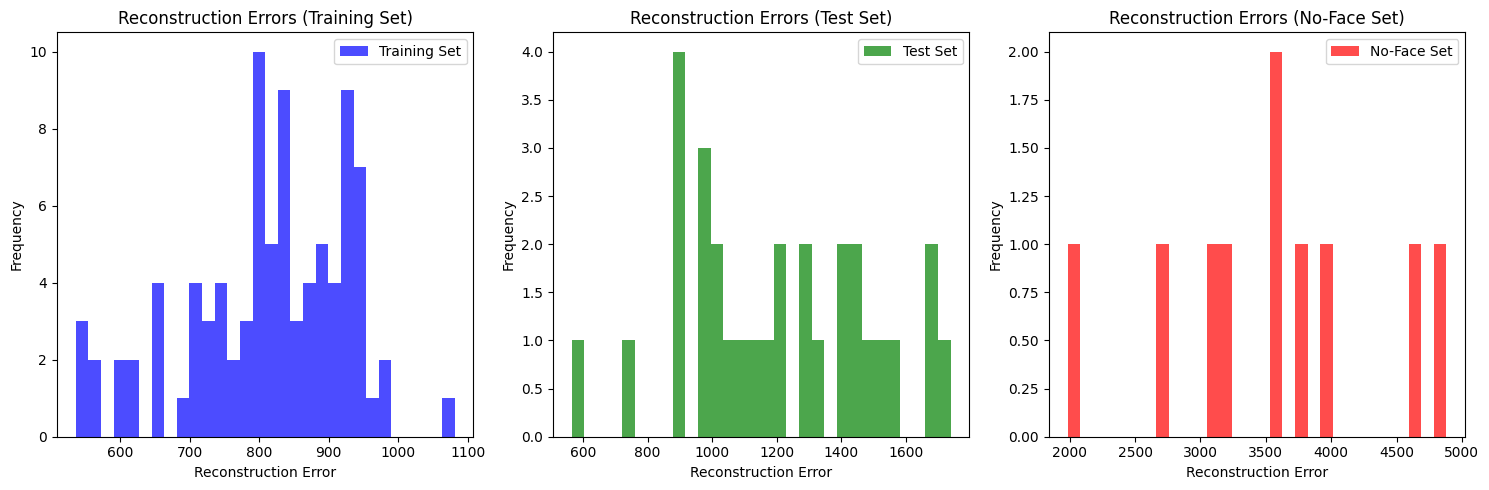

Training Set: Min Error = 536.44, Mean Error = 811.97, Max Error = 1080.76
Test Set: Min Error = 565.50, Mean Error = 1203.13, Max Error = 1738.37
No-Face Set: Min Error = 1984.83, Mean Error = 3519.30, Max Error = 4882.10


In [25]:
#A function to help make things easier that computes reconstruction errors only
def error_reconstruct_comp(X, mean_face, W, K):
    W_K = W[:, :K]
    errors= []
    for i in range(X.shape[1]):
        face = X[:, i]
        reconstrucetd = mean_face + np.dot(W_K, np.dot(W_K.T, face - mean_face))
        error = errorReconstruct(reconstrucetd, face)
        errors.append(error)
    return errors

#Computing the errors
K =30
errors_train = error_reconstruct_comp(X_train, mean_faces, normalized_eigenfaces, K)
errors_test = error_reconstruct_comp(X_test, mean_faces, normalized_eigenfaces, K)
errors_noface = error_reconstruct_comp(X_noface, mean_faces, normalized_eigenfaces, K)

# Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(errors_train, bins=30, color='blue', alpha=0.7, label='Training Set')
plt.title("Reconstruction Errors (Training Set)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(errors_test, bins=30, color='green', alpha=0.7, label='Test Set')
plt.title("Reconstruction Errors (Test Set)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(errors_noface, bins=30, color='red', alpha=0.7, label='No-Face Set')
plt.title("Reconstruction Errors (No-Face Set)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


#stats
train_min, train_mean, train_max = np.min(errors_train), np.mean(errors_train), np.max(errors_train)
test_min, test_mean, test_max = np.min(errors_test), np.mean(errors_test), np.max(errors_test)
noface_min, noface_mean, noface_max = np.min(errors_noface), np.mean(errors_noface), np.max(errors_noface)

print(f"Training Set: Min Error = {train_min:.2f}, Mean Error = {train_mean:.2f}, Max Error = {train_max:.2f}")
print(f"Test Set: Min Error = {test_min:.2f}, Mean Error = {test_mean:.2f}, Max Error = {test_max:.2f}")
print(f"No-Face Set: Min Error = {noface_min:.2f}, Mean Error = {noface_mean:.2f}, Max Error = {noface_max:.2f}")

# We can see that the training set erros are the lowest which is expected as the eingenfaces are drived from this set.
# Test set erros are higher than the training set errors which are also expected as the eigenfaces are not drived from this set but 
# as this set still contains faces its errros are still similar to the training set (at least once compared to the no face set.)
# The no-face set has the highest errors, as they do not contain faces while we do reconstruction based on eigenfaces.


2. Visualize the reconstruction error by displaying the original image and the reconstructed image for 10 images of the face database, and for the 10 images of the noface database. Comment the results.

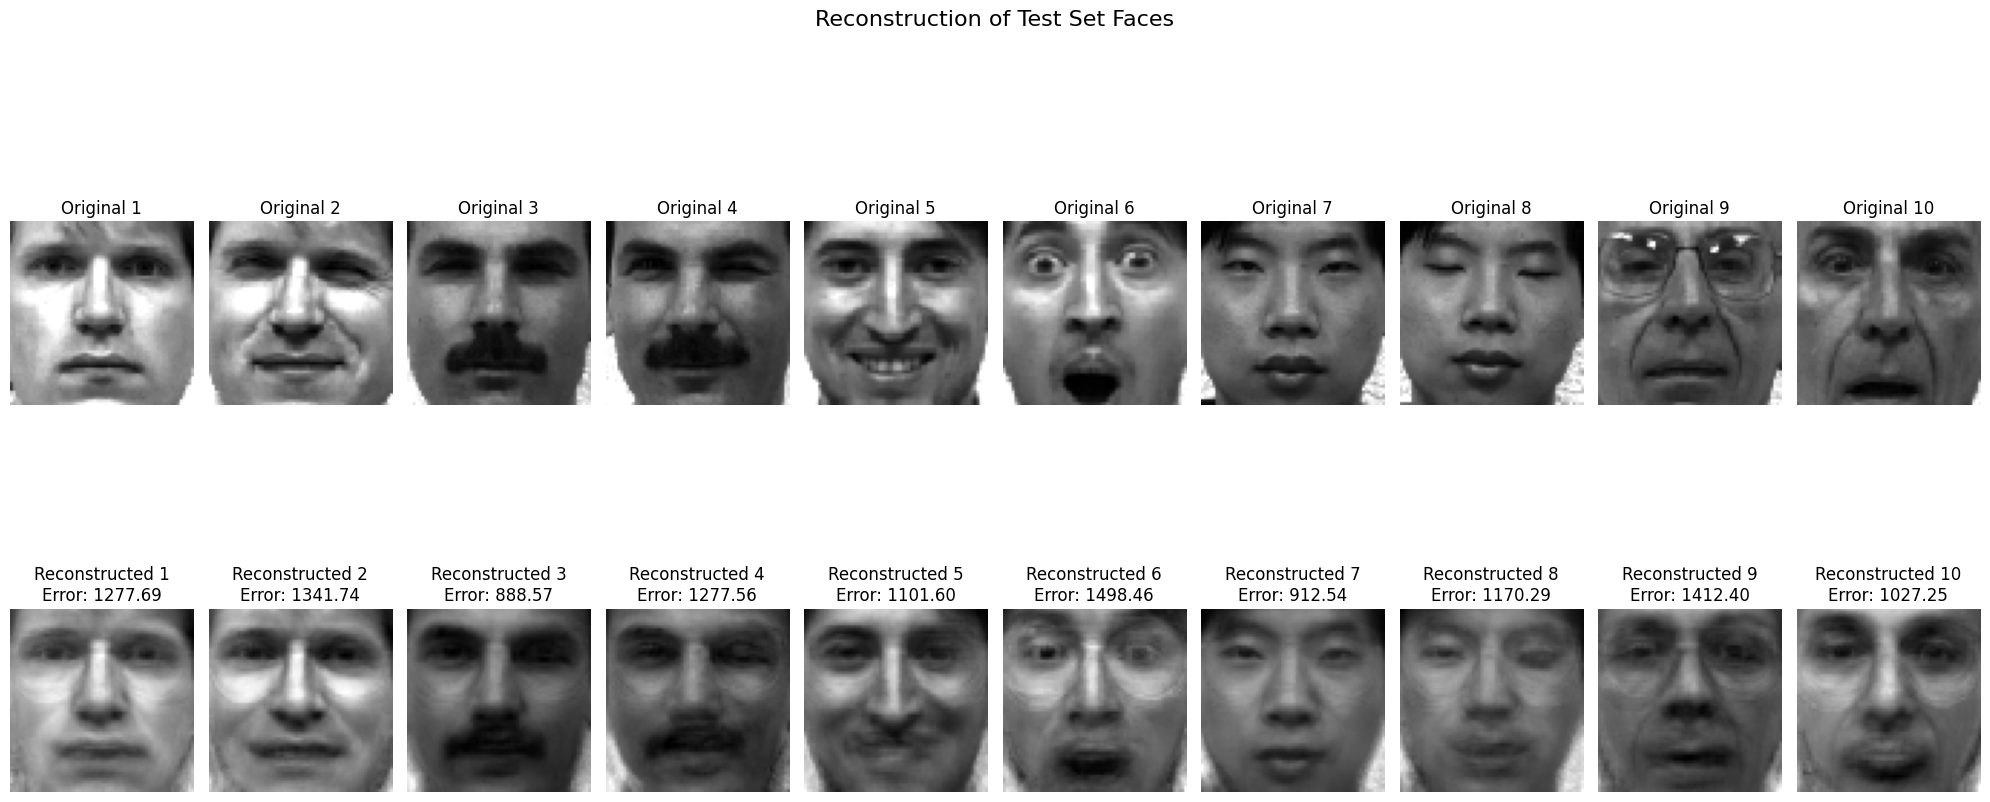

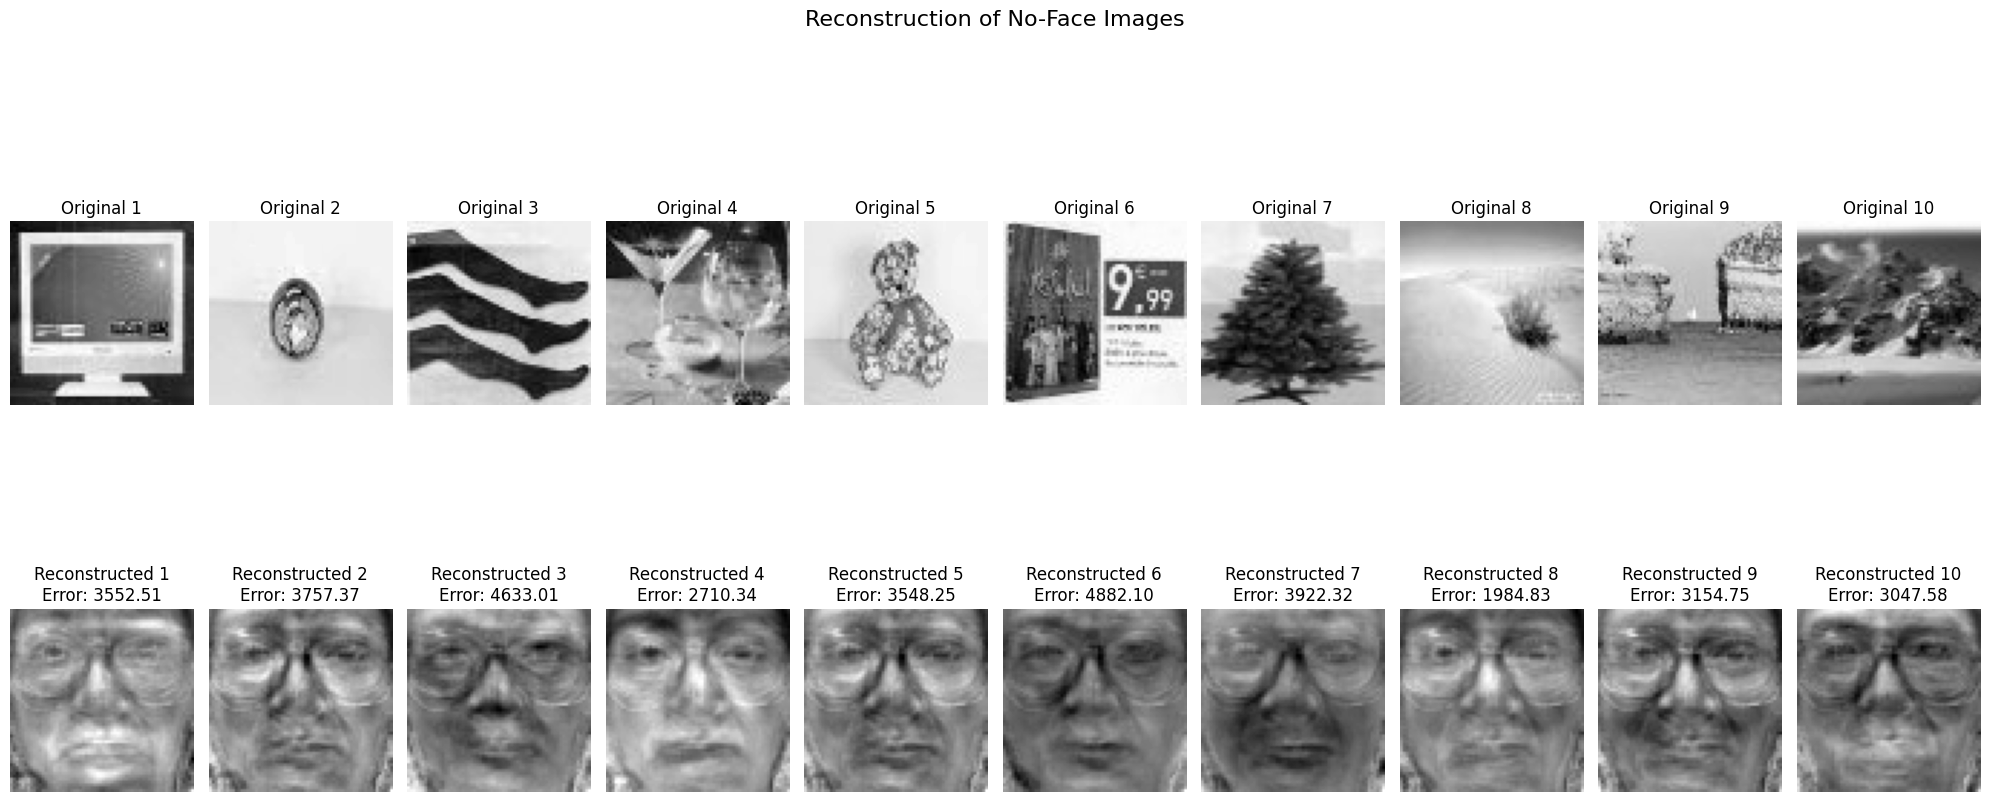

In [26]:
#A function to help make things easier that visualize
def visualize_reconstruction(X, mean_face, W, K, num_images, title):
    W_K = W[:, :K]
    plt.figure(figsize=(20, 10))

    for i in range(num_images):
        original = X[:, i]
        z = np.dot(W_K.T, original - mean_face)
        reconstructed = mean_face + np.dot(W_K, z)
        error = np.linalg.norm(original - reconstructed)

        # Display original image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original.reshape(64, 64).T, cmap="gray")
        plt.title(f"Original {i+1}")
        plt.axis("off")

        # Display reconstructed image
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(reconstructed.reshape(64, 64).T, cmap="gray")
        plt.title(f"Reconstructed {i+1}\nError: {error:.2f}")
        plt.axis("off")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


visualize_reconstruction(X_test, mean_faces, normalized_eigenfaces, K, 10, "Reconstruction of Test Set Faces")
visualize_reconstruction(X_noface, mean_faces, normalized_eigenfaces, K, 10, "Reconstruction of No-Face Images")

# We can see that the reconstructed images for the test dataset look like images of faces as expected since the original image is also a face. 
# However, the faces (once reconstructed) could look slightly different. This is also expected since we concluded in the question above that 
# they have higher errors compared to the training dataset.

# The interesting aspect we can see is that, for the no-face dataset, even though the original images do not contain any faces, the 
# reconstructed images look like faces (very distorted). This is also an expected outcome as we reconstruct based on eigenfaces, so the
# reconstruction is done in a way where we want an image at the end. 
# It must be noted that even though this is a logically expected outcome, it is still surprising to see! 